
# Project: Investigate a Dataset (TMDb movie data!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Focus :-
 **1**: In which month the maximum and minimum number of movies are released ?

 **2**: Which genres are most popular till now?

 **3**: Movies properties with respect to time ?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
from datetime import datetime

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('tmdb-movies.csv')
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline      ...       \
0              The park is open.      ...        
1             What a Lovely Day.      ...        
2     One Choice Can Destroy You      ...        
3  Every generation has a story.      ...        
4            Vengeance Hits Home      ...        

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [3]:
#no. of rows and columns
df.shape

(10866, 21)

In [4]:
#no. of rows in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
#checking the no. of null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
#checking if there are any duplicate values
df.duplicated().all()

False

In [7]:
#checking total duplicate values
df.duplicated().sum()

1

In [8]:
#the number of unique values 
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [9]:
#data types
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object


## Data Cleaning 


### Dropping duplicates

In [10]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()
#now we can see the number of duplicate values in the dataframe is zero

0

### Treating Null Values

In [11]:
#checking the rows where imdb_id is null
df[df['imdb_id'].isnull()].head(5)

id imdb_id  popularity  budget  revenue  \
548   355131     NaN    0.108072       0        0   
997   287663     NaN    0.330431       0        0   
1528   15257     NaN    0.607851       0        0   
1750  101907     NaN    0.256975       0        0   
2401   45644     NaN    0.067753       0        0   

                                       original_title  \
548                        Sense8: Creating the World   
997              Star Wars Rebels: Spark of Rebellion   
1528                               Hulk vs. Wolverine   
1750                                    Hulk vs. Thor   
2401  Opeth: In Live Concert At The Royal Albert Hall   

                                                   cast              homepage  \
548   Tuppence Middleton|Bae Doona |Brian J. Smith|A...                   NaN   
997   Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...                   NaN   
1528  Fred Tatasciore|Bryce Johnson|Steve Blum|Nolan...                   NaN   
1750  Graham McTavish|Fred Tatasciore|Matthew Wolf|J...                   NaN   
2401  Mikael Ã…kerfeldt|Martin "Axe" Axenrot|Martin ...  http://www.opeth.com   

                       director  \
548                         NaN   
997   Steward Lee|Steven G. Lee   
1528                 Frank Paur   
1750                    Sam Liu   
2401                        NaN   

                                                tagline     ...       \
548                                                 NaN     ...        
997                                                 NaN     ...        
1528                                                NaN     ...        
1750                   A Battle Between God and Monster     ...        
2401  The Loyal Disharmonic Orchestra, Conducted By ...     ...        

                                               overview runtime  \
548                                                 NaN      25   
997   A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...      44   
1528  Department H sends in Wolverine to track down ...      38   
1750  For ages, Odin has protected his kingdom of As...      41   
2401  As part of the ongoing celebration of their 20...     163   

                                        genres production_companies  \
548                Documentary|Science Fiction              Netflix   
997                                        NaN                  NaN   
1528          Animation|Action|Science Fiction       Marvel Studios   
1750  Action|Animation|Fantasy|Science Fiction       Marvel Studios   
2401                                     Music                  NaN   

     release_date vote_count  vote_average  release_year  budget_adj  \
548       8/10/15         12           7.5          2015         0.0   
997       10/3/14         13           6.8          2014         0.0   
1528      1/27/09         38           6.9          2009         0.0   
1750      1/27/09         38           6.4          2009         0.0   
2401      9/21/10         10           8.6          2010         0.0   

      revenue_adj  
548           0.0  
997           0.0  
1528          0.0  
1750          0.0  
2401          0.0  

[5 rows x 21 columns]

In [12]:
#droppng null values corresponding to the imdb_id column 
df.dropna(subset=['imdb_id'],inplace=True)
#confirming changes
df.isnull().sum()

id                         0
imdb_id                    0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7921
director                  40
tagline                 2817
keywords                1487
overview                   3
runtime                    0
genres                    21
production_companies    1025
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

# Now the data is relatively clean.

### Dropping Extraneous Columns

In [13]:
#checking extraneous columns
df.head(1)

id    imdb_id  popularity     budget     revenue  original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810  Jurassic World   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   

                        homepage         director            tagline  \
0  http://www.jurassicworld.com/  Colin Trevorrow  The park is open.   

       ...                                                overview runtime  \
0      ...       Twenty-two years after the events of Jurassic ...     124   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  

[1 rows x 21 columns]

In [14]:
#list for the columns to be dropped
dlist = [ 'id', 'homepage', 'keywords', 'tagline','overview']
#dropping the columns
df.drop(dlist, axis=1, inplace=True)

### Changing the data types 

In [15]:
#changing the dtype
df['release_date'] = pd.to_datetime(df['release_date'])

In [16]:
#confirming the changes
df['release_date'].dtypes

dtype('<M8[ns]')

Extracting month 

In [17]:
df['release_month']=df['release_date']

In [18]:
df['release_month'] = df['release_month'].dt.month

In [19]:
df['release_month_num'] = df['release_month']

In [20]:
#converting it to strings
df['release_month'] = df['release_month'].astype(str)

In [21]:
#Converting the month values to month name
df['release_month']=df['release_month'].str.replace('12','December')
df['release_month']=df['release_month'].str.replace('11','November')
df['release_month']=df['release_month'].str.replace('10','October')
df['release_month']=df['release_month'].str.replace('9','September')
df['release_month']=df['release_month'].str.replace('8','August')
df['release_month']=df['release_month'].str.replace('7','July')
df['release_month']=df['release_month'].str.replace('6','June')
df['release_month']=df['release_month'].str.replace('5','May')
df['release_month']=df['release_month'].str.replace('4','April')
df['release_month']=df['release_month'].str.replace('3','March')
df['release_month']=df['release_month'].str.replace('2','February')
df['release_month']=df['release_month'].str.replace('1','January')

In [22]:
#we can see now 
df['release_month'].head()

0        June
1         May
2       March
3    December
4       April
Name: release_month, dtype: object

### Removing the erroneous values

In [23]:
df[df['runtime']==0].head(1)

imdb_id  popularity  budget  revenue            original_title  \
92  tt3608646    1.876037       0        0  Mythica: The Necromancer   

                                                 cast       director  runtime  \
92  Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...  A. Todd Smith        0   

                      genres  \
92  Fantasy|Action|Adventure   

                                 production_companies release_date  \
92  Arrowstorm Entertainment|Camera 40 Productions...   2015-12-19   

    vote_count  vote_average  release_year  budget_adj  revenue_adj  \
92          11           5.4          2015         0.0          0.0   

   release_month  release_month_num  
92      December                 12

In [24]:
sum(df['runtime']==0)
#as we can see that the total values containing erreneous values are 31 and as compared to the total values are very less
#we can drop them directly

31

In [25]:
#dropping the zero values
df=df[df['runtime']!=0]

In [26]:
#confirming the change
sum(df['runtime']==0)

0

<a id='eda'></a>
## Exploratory Data Analysis



### Question 1 ( In which month the maximum and minimum number of movies are released ?)

In [27]:
#checking which parameters are needed for this question to be answered !!
df.head(2)

imdb_id  popularity     budget     revenue      original_title  \
0  tt0369610   32.985763  150000000  1513528810      Jurassic World   
1  tt1392190   28.419936  150000000   378436354  Mad Max: Fury Road   

                                                cast         director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...    George Miller   

   runtime                                     genres  \
0      124  Action|Adventure|Science Fiction|Thriller   
1      120  Action|Adventure|Science Fiction|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...   2015-05-13        6185   

   vote_average  release_year    budget_adj   revenue_adj release_month  \
0           6.5          2015  1.379999e+08  1.392446e+09          June   
1           7.1          2015  1.379999e+08  3.481613e+08           May   

   release_month_num  
0                  6  
1                  5

In [28]:
#using groupby to get the number of movies released in each month
rq_1=df.groupby(['release_month_num','release_month'],as_index=False)['imdb_id'].count()
#sorting them in the month order
rq_1.sort_values('release_month_num')
#dropping the 'release_month_num' column as it is of no use now !.
rq_1.drop(['release_month_num'],axis=1, inplace=True)

In [29]:
#renaming the column to a more understandble name
rq_1.rename(columns={'imdb_id':'Count'},inplace=True)

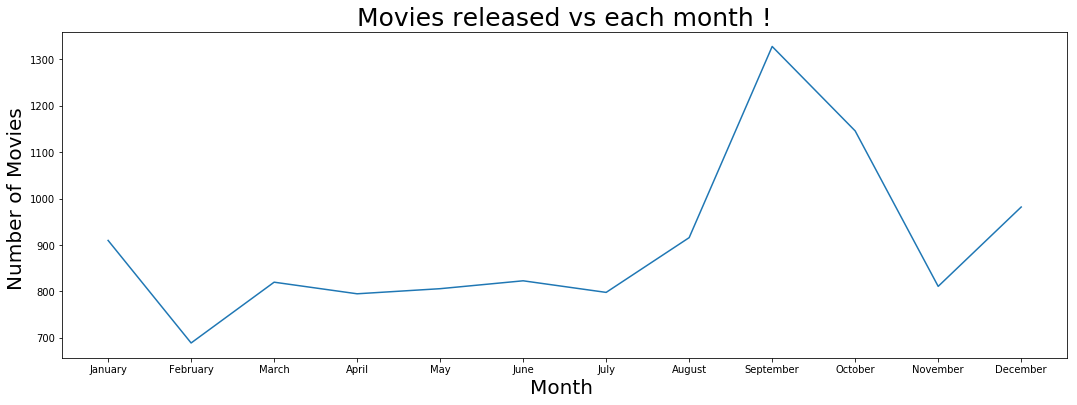

In [30]:
def analysis1():
    #setting the figure size 
    plt.subplots(figsize=(18, 6))
    #plotting the graph
    plt.plot( rq_1.release_month , rq_1.Count)
    #setting the graph title
    plt.title('Movies released vs each month !',color='black', fontsize = 25)
    #setting the x-label
    plt.xlabel('Month ', fontsize = 20)
    #setting the y-label
    plt.ylabel('Number of Movies ', fontsize = 20);
analysis1()

## we can see that the maximum no. of movies are released in September. The minimum number of movies are released in  of February !


## Question 2  (Which genres are most popular till now?)

In [31]:
#checking which columns of data are required to answer the question!
df.head(1)

imdb_id  popularity     budget     revenue  original_title  \
0  tt0369610   32.985763  150000000  1513528810  Jurassic World   

                                                cast         director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   

   runtime                                     genres  \
0      124  Action|Adventure|Science Fiction|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09        5562   

   vote_average  release_year    budget_adj   revenue_adj release_month  \
0           6.5          2015  1.379999e+08  1.392446e+09          June   

   release_month_num  
0                  6

In [32]:
#splitting the hybrid genres into single type
rq_2 = df['genres'].str.cat(sep="|").split("|")
#creating a data-frame from the output received
rq_2 =pd.DataFrame(rq_2)
#giving a column-name
rq_2.columns = ['genre']

In [33]:
#checking the total values of genres
A=rq_2['genre'].value_counts(ascending=False).sum()

In [34]:
#creating a duplicate of genre column to perform operations
rq_2['genre_copy']=list(rq_2['genre'])

In [35]:
#deriving the count of each genre type by using group by method !
rq_2=rq_2.groupby('genre',as_index=False)['genre_copy'].count()

In [36]:
#giving new names to the columns!
rq_2.columns = ['genre_type', 'no_of_movies']
#sorting with max to min
rq_2.sort_values(['no_of_movies'],ascending=True,inplace=True)

In [37]:
#deriving and storing the sum into a new variable !
B=rq_2['no_of_movies'].sum()

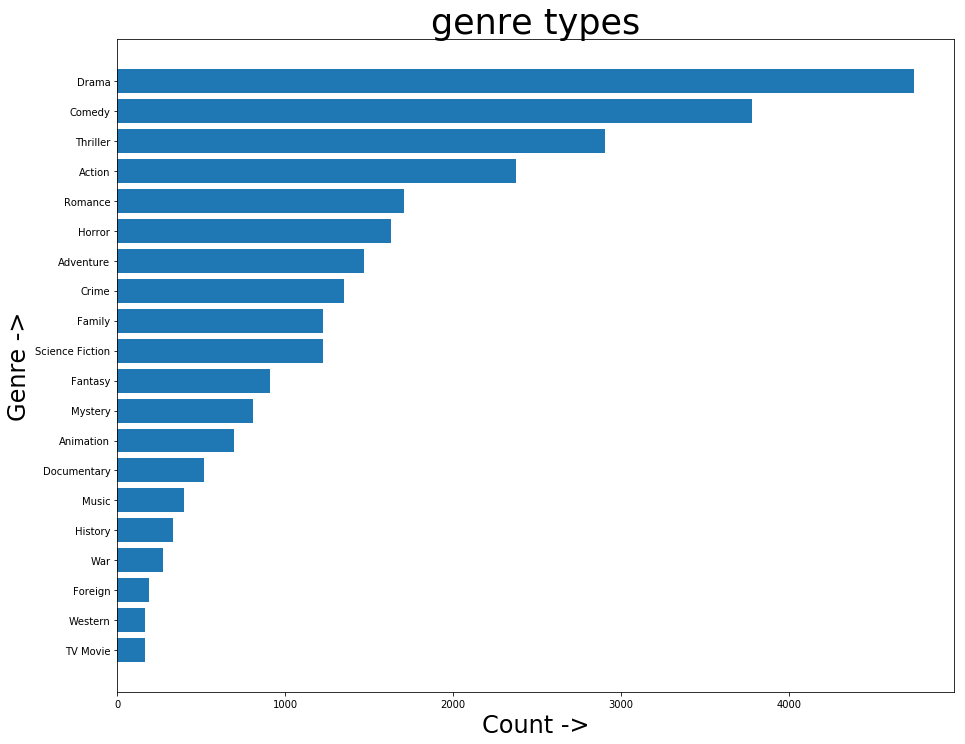

In [38]:
def analysis2():
    plt.subplots(figsize=(15,12))
    #plotting the graph
    plt.barh( rq_2.genre_type , rq_2.no_of_movies  )
    plt.title('genre types',color='black', fontsize = 35)
    plt.xlabel('Count ->', fontsize = 24)
    plt.ylabel('Genre ->', fontsize = 24);
analysis2()

It seems that the drama, comedy, thriller and action are the most famous genres.

##  Question 3 (  Is there any  change to movie properties with respect to time ? )

In [39]:
df.head(5)

imdb_id  popularity     budget     revenue                original_title  \
0  tt0369610   32.985763  150000000  1513528810                Jurassic World   
1  tt1392190   28.419936  150000000   378436354            Mad Max: Fury Road   
2  tt2908446   13.112507  110000000   295238201                     Insurgent   
3  tt2488496   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4  tt2820852    9.335014  190000000  1506249360                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

   runtime                                     genres  \
0      124  Action|Adventure|Science Fiction|Thriller   
1      120  Action|Adventure|Science Fiction|Thriller   
2      119         Adventure|Science Fiction|Thriller   
3      136   Action|Adventure|Science Fiction|Fantasy   
4      137                      Action|Crime|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...   2015-05-13        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...   2015-03-18        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot   2015-12-15        5292   
4  Universal Pictures|Original Film|Media Rights ...   2015-04-01        2947   

   vote_average  release_year    budget_adj   revenue_adj release_month  \
0           6.5          2015  1.379999e+08  1.392446e+09          June   
1           7.1          2015  1.379999e+08  3.481613e+08           May   
2           6.3          2015  1.012000e+08  2.716190e+08         March   
3           7.5          2015  1.839999e+08  1.902723e+09      December   
4           7.3          2015  1.747999e+08  1.385749e+09         April   

   release_month_num  
0                  6  
1                  5  
2                  3  
3                 12  
4                  4

In [40]:
rq_3=df

In [41]:
rq_3.drop(['imdb_id','original_title','cast','director','genres','production_companies','release_date','release_month_num'],axis=1,inplace=True)

In [42]:
rq_3.head()

popularity     budget     revenue  runtime  vote_count  vote_average  \
0   32.985763  150000000  1513528810      124        5562           6.5   
1   28.419936  150000000   378436354      120        6185           7.1   
2   13.112507  110000000   295238201      119        2480           6.3   
3   11.173104  200000000  2068178225      136        5292           7.5   
4    9.335014  190000000  1506249360      137        2947           7.3   

   release_year    budget_adj   revenue_adj release_month  
0          2015  1.379999e+08  1.392446e+09          June  
1          2015  1.379999e+08  3.481613e+08           May  
2          2015  1.012000e+08  2.716190e+08         March  
3          2015  1.839999e+08  1.902723e+09      December  
4          2015  1.747999e+08  1.385749e+09         April

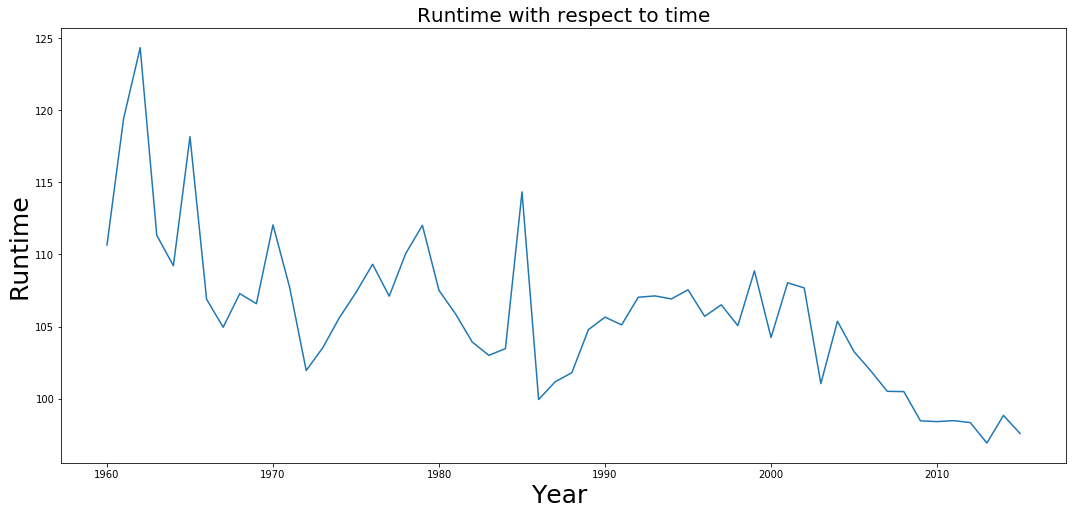

In [43]:
def analysis3():
    #assigning the parameters to be plotted in a variable
    graph1=rq_3.groupby('release_year')['runtime'].mean()
    #setting the graph size
    plt.subplots(figsize=(18,8))
    #plotting the graph
    graph1.plot()
    #setting the x-label
    plt.xlabel('Year ', fontsize = 25)
    #setting the y-label
    plt.ylabel('Runtime', fontsize = 25)
    #setting the graph title
    plt.title('Runtime with respect to time',color='black', fontsize = 20);
analysis3()

#### It seems that the runtime has declined over time . 

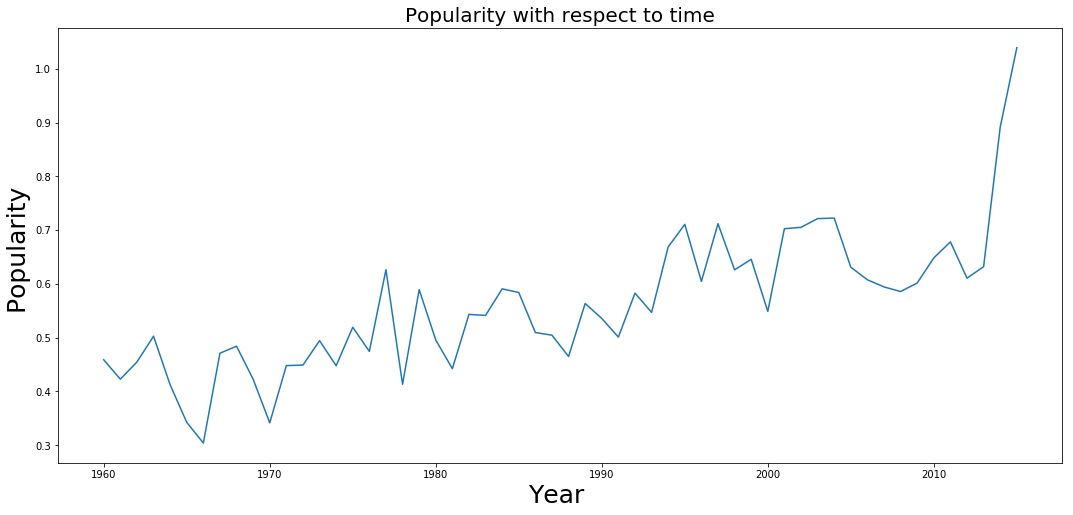

In [44]:
def analysis3b():
    graph1=rq_3.groupby('release_year')['popularity'].mean()
    plt.subplots(figsize=(18,8))
    graph1.plot()
    plt.xlabel('Year ', fontsize = 25)
    plt.ylabel('Popularity ', fontsize = 25)
    plt.title('Popularity with respect to time',color='black', fontsize = 20);
analysis3b()

#### It seems that popularity of movies have increased over time. 

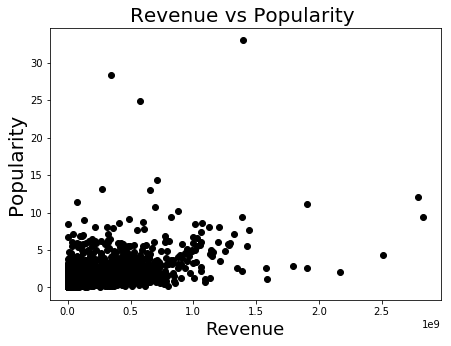

In [53]:
def scatterplot():
    ##plotting the scatterplot
    plt.subplots(figsize=(7,5))
    plt.scatter(x=df['revenue_adj'], y=df['popularity'],color='black')
    #setting the x-label
    plt.xlabel('Revenue',color='black', fontsize = 18)
    #setting the y-label
    plt.ylabel('Popularity', fontsize = 20)
    #setting the graph title
    plt.title('Revenue vs Popularity ', fontsize = 20);
scatterplot()

## We can see that revenue is correlated with popularity from the above scatterplot.

<a id='conclusions'></a>
## Conclusions

 **->**: Most of the movies are released in the months of September, October , December and January.

 **->**: Drama, comedy, thriller,action and romance are the most famous genres.

 **->**: History, war, foreign, tv movie and western are the least famous genres.

 **->**: It seems that the runtime has declined over time . People love to see short movies instead of long movies .

 **->**: It seems that popularity of movies have increased over time. People have started showing love to movies. Also we can say quality movies are also being produced over time.
 
 **->**: It seems that the revenue is correlated with populairity.


## Limitations

> **->**: The data doesn't seems to be purely accurate as it has a lot of null values.

> **->**: Also,it has some non-justified values such as budget ,revenues and run-times of movies are somewhere 0,2 or minimal like that which is not possible as from my perspective.

